In [ ]:
import matplotlib.pyplot as plt
import uproot
import numpy as np
import pandas as pd

from pathlib import Path
from sklearn.model_selection import train_test_split

from datetime import datetime
import sys

sys.path.insert(1, '/afs/desy.de/user/a/axelheim/private/MC_studies/Dstlnu_Bt_generic/util_funcs/')
from pandas_colFuncs import  B_ID

In [5]:
root_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/"

## load raw data

In [7]:
merged = "merged_"
tmp_data = True
if tmp_data:
    merged += "tmp_"
fileY4S = uproot.open(root_path + merged + "DXtagDstl.root:variables")

In [8]:
names = ["gammas","electrons","pions","kaons","muons"]
dfs = []
for name in names:
    filename = root_path + merged + "{}.root:variables".format(name)
    #filename = afsPath + "{}.root:variables".format(name)
    print(filename)
    tmpFileFSPs = uproot.open(filename)
    df_tmp = tmpFileFSPs.arrays(library="pd")
    dfs.append(df_tmp)

/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/merged_tmp_gammas.root:variables
/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/merged_tmp_electrons.root:variables
/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/merged_tmp_pions.root:variables
/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/merged_tmp_kaons.root:variables
/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/sub00/merged_tmp_muons.root:variables


In [ ]:
df_FSPs = pd.concat(dfs)
df_Y4S = fileY4S.arrays(library="pd")

In [ ]:
df_Y4S.shape[0]

In [ ]:
df_FSPs.shape[0]

In [ ]:
df_Y4S["Hc_isSignalAcceptMissingGamma"].value_counts()

## take sample

In [ ]:
all_evt_nums = df_FSPs['__event__'].unique()
all_evt_nums.shape[0]

In [ ]:
sample_evt_nums = np.random.choice(all_evt_nums, size=100000)
sample_evt_nums.shape[0]

In [ ]:
TMPdf_FSPs = df_FSPs[df_FSPs['__event__'].isin(sample_evt_nums)]
TMPdf_Y4S = df_Y4S[df_Y4S['__event__'].isin(sample_evt_nums)]

In [ ]:
print("df_FSPs.shape[0]:",TMPdf_FSPs.shape[0])
print("numEvents:",TMPdf_FSPs['__event__'].unique().shape[0])
print("df_FSPs.shape[0]:",TMPdf_Y4S.shape[0])
print("numEvents:",TMPdf_Y4S['__event__'].unique().shape[0])

## preprocess (delete doubles, add labels etc.)

In [ ]:
df_FSPs = df_FSPs.sort_values("basf2_used",ascending=False).drop_duplicates(subset=("__event__","uniqueParticleIdentifier"), keep='first')

In [ ]:
df_FSPs['B_ID'] = df_FSPs.apply(B_ID, axis=1)

In [ ]:
def labels(s):
    label = -1
    if int(s['B_ID']) == 0:
        label = 0 # background, cause not related to MC Particles
    else: 
        event_num = (s['__event__'])
        B_sigID = df_Y4S[df_Y4S['__event__'] == event_num].iloc[0]['Bsig_uniqParID']
        
        if int(s['B_ID']) == B_sigID:
            label = 2 # Bsig
        else:
            label = 1 #X
    return label

In [ ]:
df_FSPs['label'] = df_FSPs.apply(labels, axis=1)

## keys

In [9]:
df_FSPs.keys()

Index(['Unnamed: 0', 'Unnamed: 0.1', '__experiment__', '__run__', '__event__',
       '__candidate__', '__ncandidates__', '__weight__', 'basf2_X',
       'basf2_used', 'basf2_Bsig', 'isSignal', 'uniqueParticleIdentifier',
       'mcErrors', 'mcPDG', 'genMotherID', 'genMotherP', 'genMotherPDG', 'px',
       'py', 'pz', 'pt', 'p', 'E', 'charge', 'dr', 'dz', 'clusterReg',
       'clusterE9E21', 'M', 'PDG', 'kaonID', 'pionID', 'protonID', 'muonID',
       'electronID', 'deuteronID', 'genMothPDG_0', 'genMothPDG_1',
       'genMothPDG_2', 'genMothPDG_3', 'genMothPDG_4', 'genMothPDG_5',
       'genMothPDG_6', 'genMothPDG_7', 'genMothPDG_8', 'genMothPDG_9',
       'mcMother0_uniqParID', 'mcMother1_uniqParID', 'mcMother2_uniqParID',
       'mcMother3_uniqParID', 'mcMother4_uniqParID', 'mcMother5_uniqParID',
       'mcMother6_uniqParID', 'mcMother7_uniqParID', 'mcMother8_uniqParID',
       'mcMother9_uniqParID', 'cmpx', 'cmpy', 'cmpz', 'cmE', 'mcPhotos',
       'goodBelleGamma', 'B_ID', 'bg', 'l

In [10]:
df_Y4S.keys()

Index(['Unnamed: 0', '__experiment__', '__run__', '__event__', '__candidate__',
       '__ncandidates__', '__weight__', 'm2RecoilSignalSide',
       'foxWolframR2_maskedNaN', 'foxWolframR2',
       ...
       'Hc_cmPy', 'Hc_cmPz', 'D_nDaughters', 'D_pt', 'D_isSignal',
       'D_uniqParID', 'Dst_uniqParID', 'Dst_DeltaM', 'Dst_isSignal',
       'isBtoDstlnu'],
      dtype='object', length=176)

## add the basf2 label

In [ ]:
def basf2_label(s):
    label = 0
 
    if s["basf2_X"] == 1.0:
        label = 1 # particle belongs to X 
    elif s["basf2_Bsig"] == 1.0:
        label = 2 # particle belongs to Bsig 
    elif s["basf2_used"] == 0.0:
        label = 0 # background  
        
    return label

In [ ]:
df_FSPs['basf2_label'] = df_FSPs.apply(basf2_label, axis=1)

In [ ]:
df_FSPs['basf2_correct'] = (df_FSPs['basf2_label'] == df_FSPs['label'])

In [17]:
df_FSPs['basf2_correct'].describe()

count     881327
unique         2
top         True
freq      506193
Name: basf2_correct, dtype: object

## save df's

In [ ]:
root_path = "/nfs/dust/belle2/user/axelheim/MC_studies/Dstlnu_Bt_generic/SHR_Hc_correctReco_BsX/SHR_dataSteering_run1/"

df_FSPs = pd.to_csv(root_path + "df_FSPs_NO_isSigCut.csv")
df_Y4S = pd.to_csv(root_path + "df_Y4S_NO_isSigCut.csv")

## check the assignment accuracy of basf2

In [15]:
groupsAllFSPs = pd.DataFrame({'count' : df_FSPs.groupby(["label","basf2_label"]).size()}).reset_index()
groupsAllFSPs

,label,basf2_label,count
0,0,0,58491
1,0,1,62869
2,0,2,15441
3,1,0,80064
4,1,1,227607
5,1,2,86480
6,2,0,35052
7,2,1,95228
8,2,2,220095


In [55]:
print("accuracy of basf2 for all particles:",round(df_FSPs[df_FSPs["basf2_correct"] == True].shape[0] / df_FSPs.shape[0] *100,2),'%')

accuracy of basf2 for all particles: 57.44 %


In [38]:
numFSPs.shape[0]

51177

In [40]:
groupsAllFSPs = pd.DataFrame({'corrects' : df_FSPs.groupby( ["__event__","basf2_correct"] ).size()}).reset_index()
basf2_failureCount = groupsAllFSPs[groupsAllFSPs["basf2_correct"] == True]

numFSPs = pd.DataFrame({'numFSPs' : df_FSPs.groupby(["__event__"]).size()}).reset_index()

basf2_stats = pd.merge(basf2_failureCount[["__event__","corrects"]],numFSPs[["__event__","numFSPs"]], on="__event__")


basf2_stats

,__event__,corrects,numFSPs
0,557,11,16
1,903,13,18
2,2070,13,20
3,2646,16,18
4,3403,9,17
...,...,...,...
51172,50996982,11,21
51173,50997399,11,15
51174,50997576,6,12
51175,50997788,12,18


In [41]:
basf2_stats["wrongs"] = basf2_stats["numFSPs"] - basf2_stats["corrects"] 
basf2_stats

,__event__,corrects,numFSPs,wrongs
0,557,11,16,5
1,903,13,18,5
2,2070,13,20,7
3,2646,16,18,2
4,3403,9,17,8
...,...,...,...,...
51172,50996982,11,21,10
51173,50997399,11,15,4
51174,50997576,6,12,6
51175,50997788,12,18,6


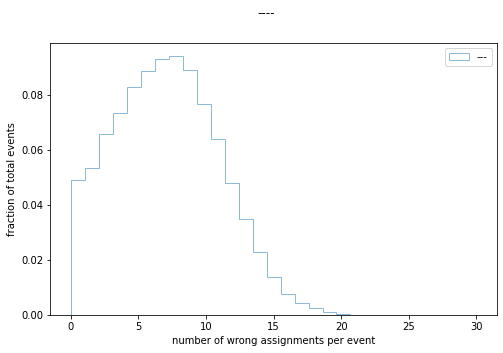

In [42]:
bins = np.linspace(0, 30, 30)
fig, ax = plt.subplots()
fig.suptitle(r'----')
fig.set_size_inches(8, 5)

ax.set_xlabel(r'number of wrong assignments per event')
ax.set_ylabel("fraction of total events")

ax.hist(basf2_stats["wrongs"],bins=bins,density=True, alpha=0.5, label=(r'---'),histtype='step')
#ax.hist(numFSPs_charged["count"],bins=bins,density=True, alpha=0.5, label=(r'charged'),histtype='step')
#ax.hist(numFSPs["count"],bins=bins,density=True, alpha=0.5, label=(r'total'),histtype='step')




ax.legend(loc='upper right')

#plt.savefig('dataSetAnaPlots/numFSPs_histo_NAHSrun1_neutrals_charged.pdf')

In [51]:
print("BASF2 assignment errors per event \n")

numEvts = basf2_stats.shape[0]
for i in range(4):
    print(i, 'errors:', round(basf2_stats[basf2_stats["wrongs"] == i].shape[0]  /  numEvts * 100, 2),'%')

i = 3
print('more than',i, 'errors:', round(basf2_stats[basf2_stats["wrongs"] > i].shape[0]  /  numEvts * 100, 2),'%')

BASF2 assignment errors per event 

0 errors: 1.57 %
1 errors: 3.5 %
2 errors: 5.52 %
3 errors: 6.8 %
more than 3 errors: 82.61 %


In [52]:
basf2_stats["wrongs"].describe()

count    51177.000000
mean         7.330129
std          3.737335
min          0.000000
25%          5.000000
50%          7.000000
75%         10.000000
max         22.000000
Name: wrongs, dtype: float64